In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('diagnosis.data',sep='\t',encoding='UTF-16',header=None,decimal=',')

In [3]:
df

,0,1,2,3,4,5,6,7
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [4]:
df.columns=['temperature','nausea','lumbar_pain','urine_pushing','micturition_pain','burning_urethra','diagnosis_inflamation','diagnosis_nephritis']

In [21]:
df.dtypes

temperature              float64
nausea                    object
lumbar_pain               object
urine_pushing             object
micturition_pain          object
burning_urethra           object
diagnosis_inflamation     object
diagnosis_nephritis       object
dtype: object

In [5]:
df.describe()

,temperature
count,120.000000
mean,38.724167
std,1.819132
min,35.500000
25%,37.100000
50%,37.950000
75%,40.600000
max,41.500000


In [6]:
df.describe(include='object')

,nausea,lumbar_pain,urine_pushing,micturition_pain,burning_urethra,diagnosis_inflamation,diagnosis_nephritis
count,120,120,120,120,120,120,120
unique,2,2,2,2,2,2,2
top,no,yes,yes,no,no,no,no
freq,91,70,80,61,70,61,70


In [7]:
df['diagnosis_nephritis'].value_counts()

diagnosis_nephritis
no     70
yes    50
Name: count, dtype: int64

In [8]:
df['diagnosis_inflamation'].value_counts()

diagnosis_inflamation
no     61
yes    59
Name: count, dtype: int64

# Nephritis

In [9]:
y=df['diagnosis_nephritis']
X=df.drop(['diagnosis_inflamation','diagnosis_nephritis'],axis=1)

## Split Model

In [10]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.1,random_state=42,stratify=y)

X_to_fit, X_val, y_to_fit, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42,stratify=y_train)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_columns = X_to_fit.select_dtypes(include=['object']).columns.to_list()

cat_pipeline=Pipeline(
                steps=[
                    ('imputer',SimpleImputer(strategy='most_frequent')),
                    ('one_hot_enconder',OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False))                    
                ]
            )
preprocessor=ColumnTransformer(
    [
                         ('cat_pipeline',cat_pipeline,categorical_columns)
                     ],
    remainder='passthrough'
    )

preprocessor.fit(X_to_fit)
X_to_fit=preprocessor.transform(X_to_fit)
X_to_fit

array([[ 1. ,  1. ,  1. ,  1. ,  0. , 40.7],
       [ 0. ,  1. ,  0. ,  0. ,  0. , 36. ],
       [ 0. ,  1. ,  1. ,  0. ,  1. , 38. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. , 37.4],
       [ 1. ,  1. ,  1. ,  1. ,  0. , 40.1],
       [ 1. ,  1. ,  0. ,  1. ,  0. , 40.4],
       [ 0. ,  1. ,  1. ,  0. ,  1. , 38.1],
       [ 1. ,  1. ,  1. ,  1. ,  0. , 40.9],
       [ 0. ,  0. ,  1. ,  0. ,  0. , 37.3],
       [ 0. ,  0. ,  1. ,  0. ,  0. , 37.1],
       [ 0. ,  0. ,  1. ,  1. ,  1. , 37.8],
       [ 1. ,  1. ,  1. ,  1. ,  0. , 40.5],
       [ 1. ,  1. ,  0. ,  1. ,  0. , 41.2],
       [ 0. ,  0. ,  1. ,  0. ,  0. , 37.8],
       [ 1. ,  1. ,  1. ,  1. ,  1. , 40.6],
       [ 0. ,  1. ,  1. ,  0. ,  1. , 41. ],
       [ 0. ,  1. ,  0. ,  0. ,  0. , 37.9],
       [ 0. ,  1. ,  1. ,  0. ,  1. , 41.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. , 40.7],
       [ 0. ,  0. ,  0. ,  0. ,  0. , 40.4],
       [ 0. ,  1. ,  0. ,  0. ,  0. , 36.6],
       [ 0. ,  1. ,  1. ,  0. ,  1. , 39.4],
       [ 0

In [12]:
preprocessor.named_transformers_

{'cat_pipeline': Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                 ('one_hot_enconder',
                  OneHotEncoder(drop='first', handle_unknown='ignore',
                                sparse_output=False))]),
 'remainder': 'passthrough'}

In [13]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_to_fit= label_encoder.fit_transform(y_to_fit)
y_to_fit

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0])

In [14]:
X_test=preprocessor.transform(X_test)
X_val=preprocessor.transform(X_val)

y_test=label_encoder.transform(y_test)
y_val=label_encoder.transform(y_val)

In [15]:
label_encoder.classes_

array(['no', 'yes'], dtype=object)

---------------------------------------------------
------------Classifier 1---------------------------------
---------------------------------------------------
Validation Dataset Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



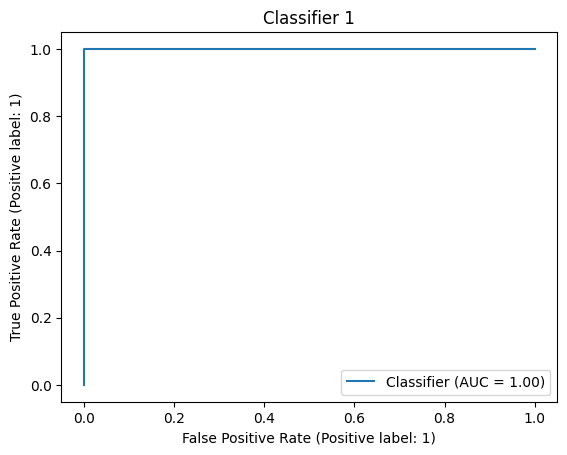

---------------------------------------------------
Test Dataset Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



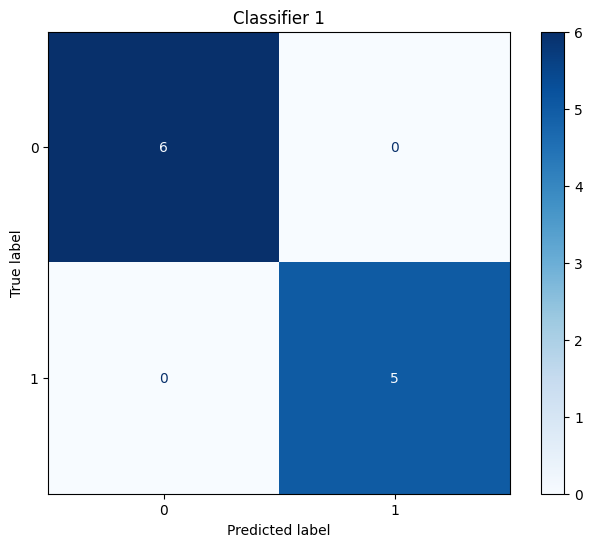

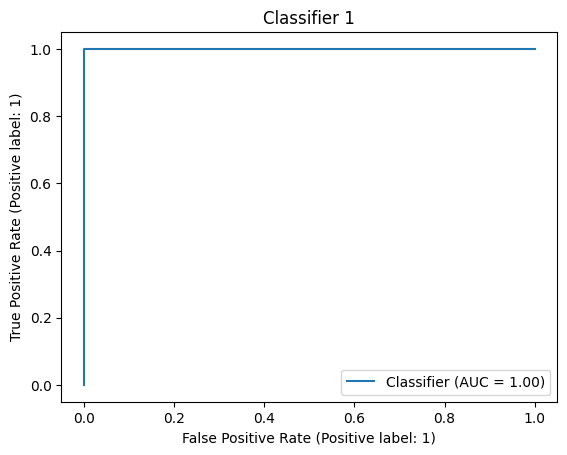

---------------------------------------------------
------------Classifier 2---------------------------------
---------------------------------------------------
Validation Dataset Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      1.00      0.91         5

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11



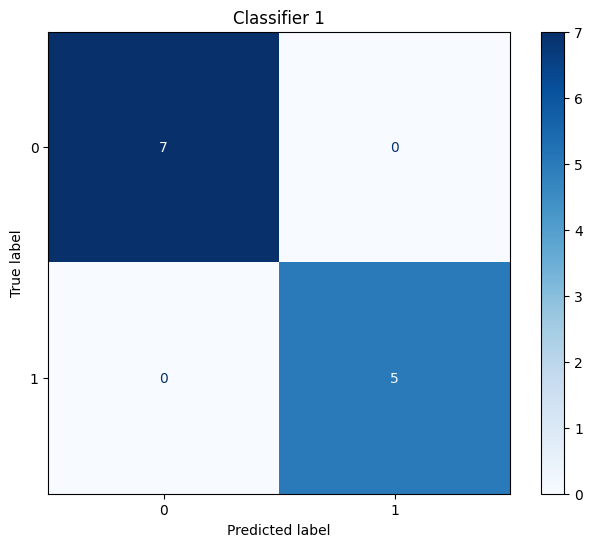

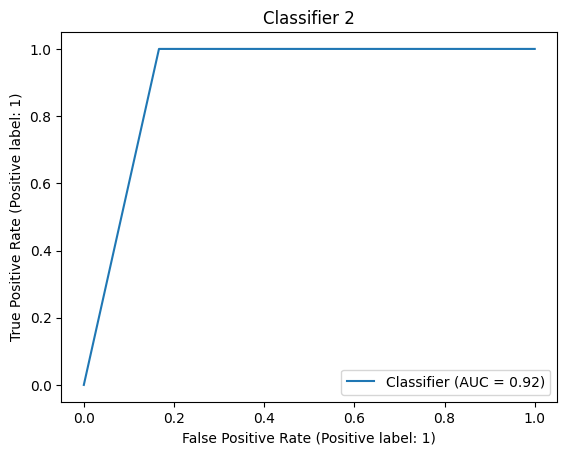

---------------------------------------------------
Test Dataset Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.83      1.00      0.91         5

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



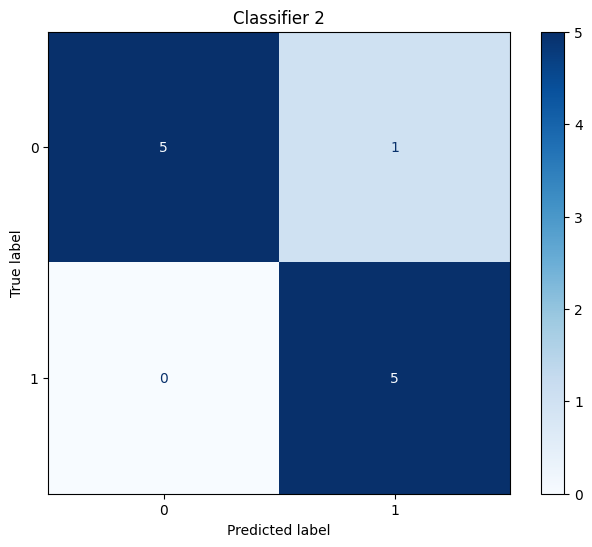

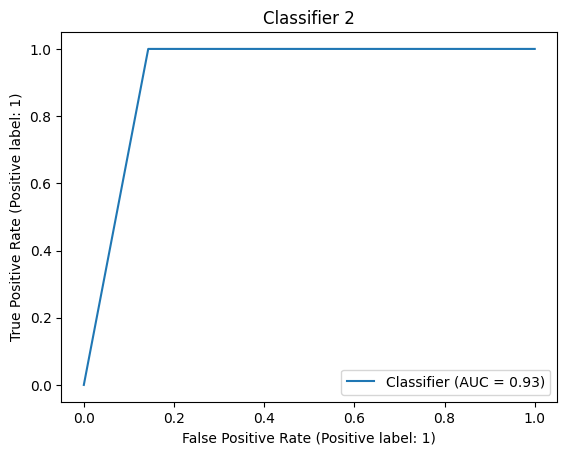

---------------------------------------------------
------------Classifier 3---------------------------------
---------------------------------------------------
Validation Dataset Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



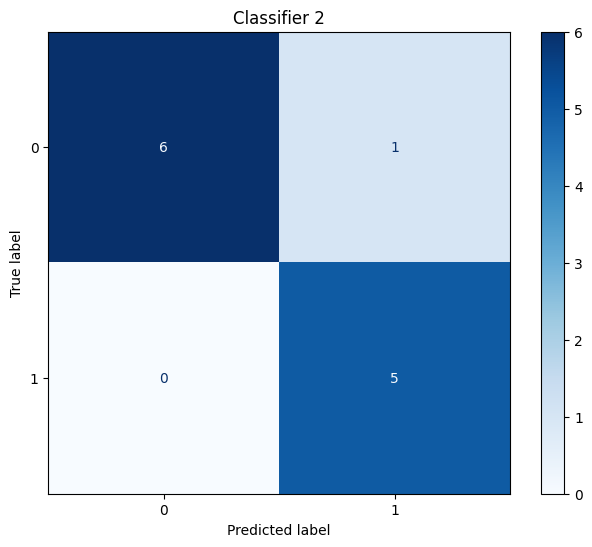

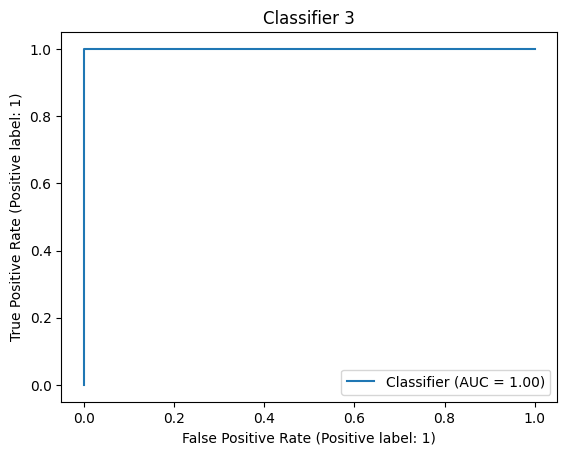

---------------------------------------------------
Test Dataset Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



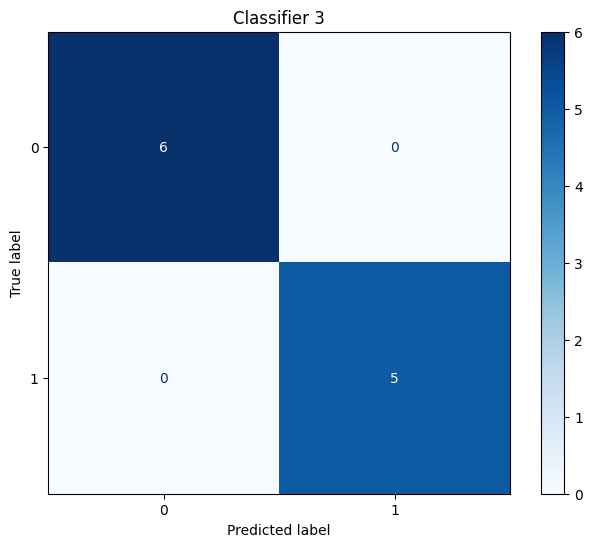

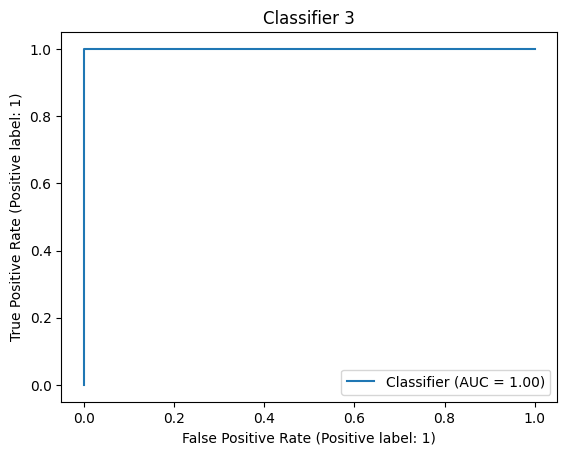

---------------------------------------------------
------------Ensemble---------------------------------
---------------------------------------------------
Validation Dataset Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



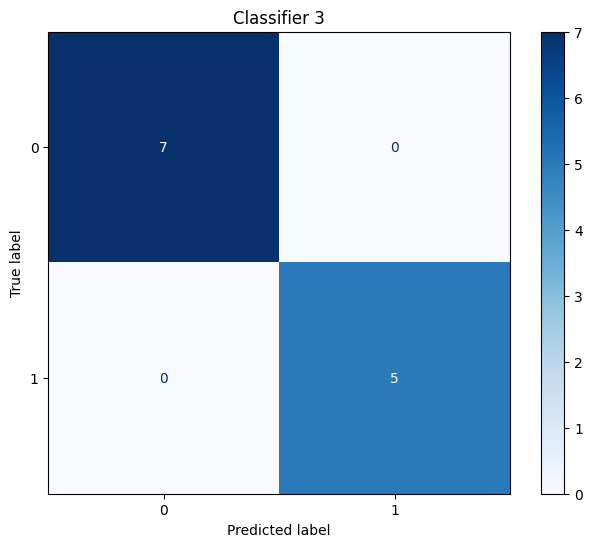

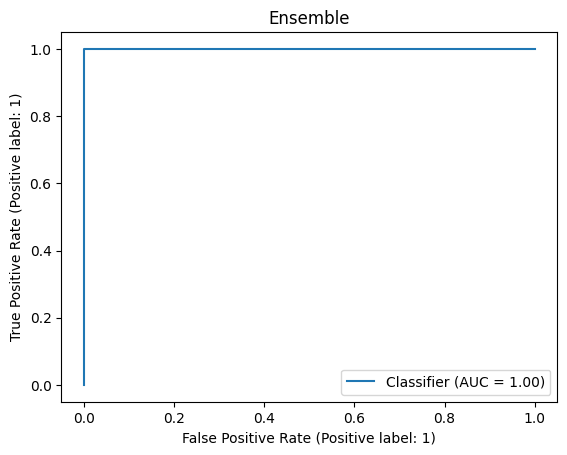

---------------------------------------------------
Test Dataset Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



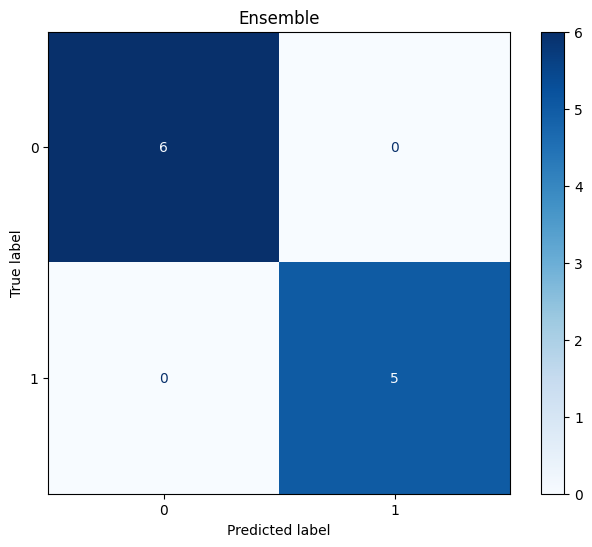

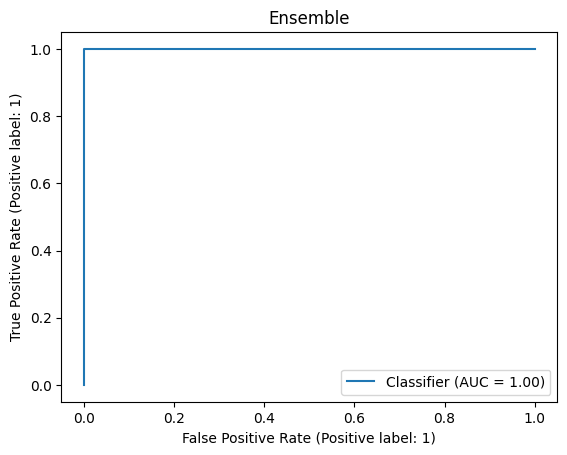

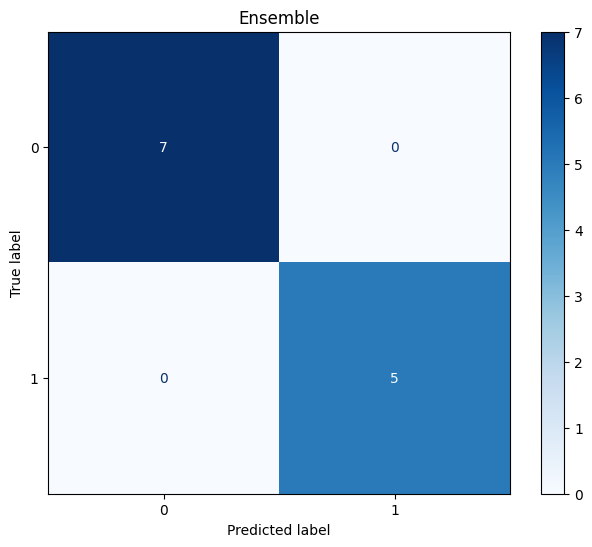

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,RocCurveDisplay,accuracy_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt


clf1 = DecisionTreeClassifier(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1, max_depth=1)
clf3 = DecisionTreeClassifier(random_state=1, max_depth=3)

estimator=[('clf1',clf1),('clf2',clf2),('clf3',clf3)]
eclf = VotingClassifier(estimators=estimator,voting='hard')

labels = ['Classifier 1', 'Classifier 2', 'Classifier 3', 'Ensemble']
for model, label in zip([clf1, clf2, clf3, eclf], labels):
    print('---------------------------------------------------')
    print(f'------------{label}---------------------------------')
    print('---------------------------------------------------')
    model.fit(X_to_fit,y_to_fit)
    pred_val=model.predict(X_val)
    print(f"Validation Dataset Accuracy: {model.score(X_val, pred_val):0.2f}")

    auc_score_valid = roc_auc_score(y_val,pred_val)  

    print(classification_report(y_val,pred_val))
    RocCurveDisplay.from_predictions(y_val,pred_val)
    plt.title(label)
    plt.show()

    cm=confusion_matrix(y_val,pred_val,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, values_format='d', cmap='Blues')
    ax.set_title(label)

    print('---------------------------------------------------')
    pred_test=model.predict(X_test)
    print(f"Test Dataset Accuracy: {model.score(X_test, pred_test):0.2f}")

    auc_score_valid = roc_auc_score(y_test,pred_test)  

    print(classification_report(y_test,pred_test))
    RocCurveDisplay.from_predictions(y_test,pred_test)
    plt.title(label)
    plt.show()

    cm=confusion_matrix(y_test,pred_test,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, values_format='d', cmap='Blues')
    ax.set_title(label)

    

Logistic Regression

---------------------------------------------------
------------Logistic Regression---------------------------------
---------------------------------------------------
Validation Dataset Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



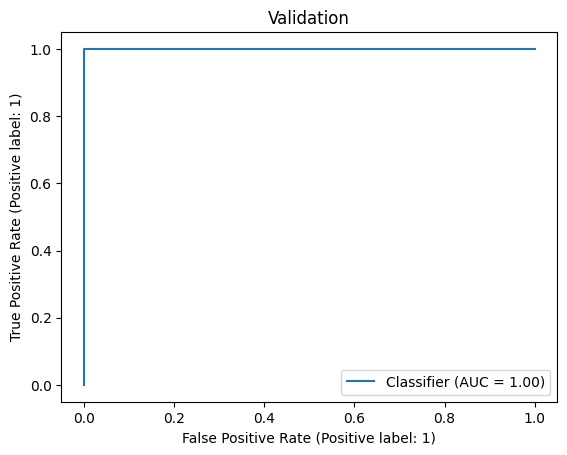

---------------------------------------------------
Test Dataset Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



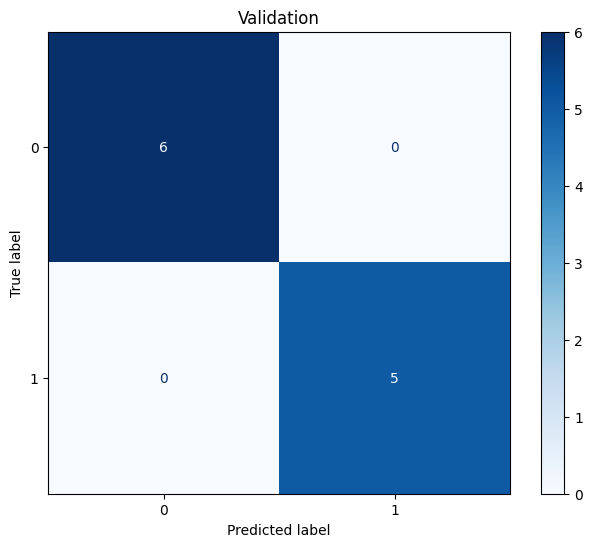

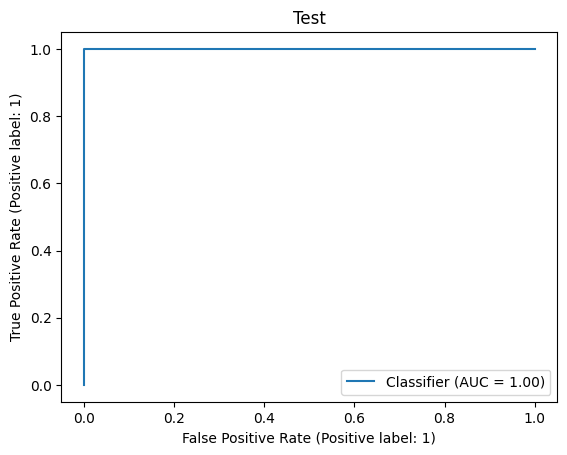

Text(0.5, 1.0, 'Test')

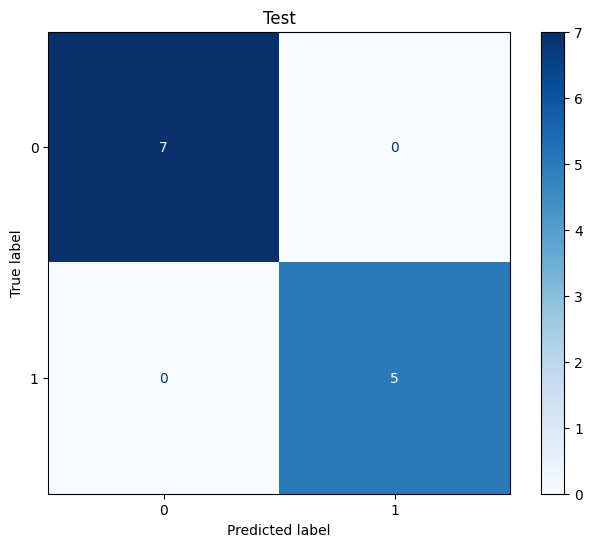

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,RocCurveDisplay,accuracy_score,ConfusionMatrixDisplay
from sklearn.ensemble import StackingClassifier


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=1)
clf3 = HistGradientBoostingClassifier(random_state=1)
clf4 = AdaBoostClassifier(random_state=1)
clf5 = DecisionTreeClassifier(random_state=1,max_depth=None)
lr = LogisticRegression(random_state=1)

model= StackingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('hgb', clf3), ('ab', clf4), ('dt', clf5)],final_estimator=lr,cv=10,stack_method='auto')


print('---------------------------------------------------')
print('------------Logistic Regression---------------------------------')
print('---------------------------------------------------')
model.fit(X_to_fit,y_to_fit)
pred_val=model.predict(X_val)
print(f"Validation Dataset Accuracy: {model.score(X_val, pred_val):0.2f}")

auc_score_valid = roc_auc_score(y_val,pred_val)  

print(classification_report(y_val,pred_val))
RocCurveDisplay.from_predictions(y_val,pred_val)
plt.title('Validation')
plt.show()

cm=confusion_matrix(y_val,pred_val,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, values_format='d', cmap='Blues')
ax.set_title('Validation')

print('---------------------------------------------------')
pred_test=model.predict(X_test)
print(f"Test Dataset Accuracy: {model.score(X_test, pred_test):0.2f}")

auc_score_valid = roc_auc_score(y_test,pred_test)  

print(classification_report(y_test,pred_test))
RocCurveDisplay.from_predictions(y_test,pred_test)
plt.title("Test")
plt.show()

cm=confusion_matrix(y_test,pred_test,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, values_format='d', cmap='Blues')
ax.set_title("Test")


---------------------------------------------------
------------SVM---------------------------------
---------------------------------------------------
Validation Dataset Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



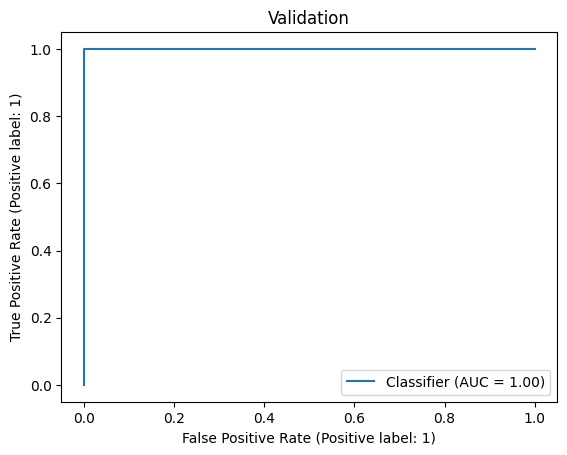

---------------------------------------------------
Test Dataset Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



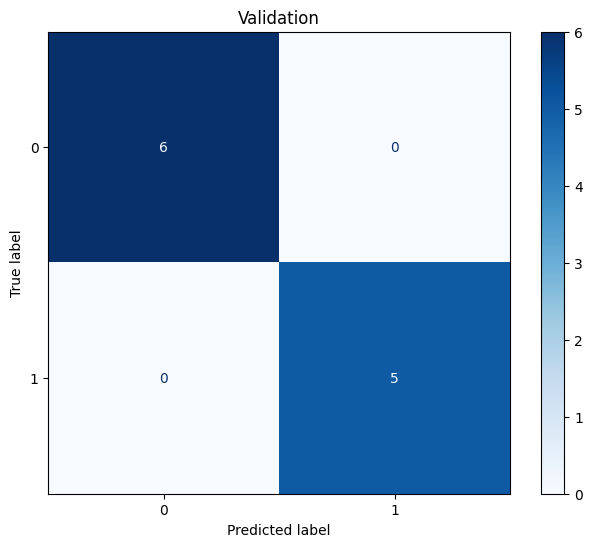

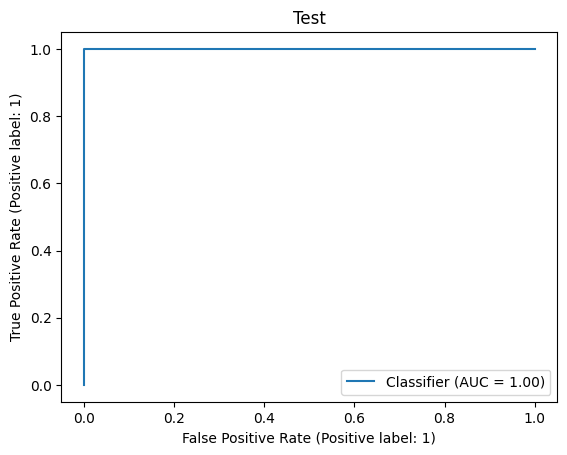

StackingClassifier(cv=10,
                   estimators=[('knn', KNeighborsClassifier()),
                               ('rf', RandomForestClassifier(random_state=1)),
                               ('hgb',
                                HistGradientBoostingClassifier(random_state=1)),
                               ('ab', AdaBoostClassifier(random_state=1)),
                               ('dt', DecisionTreeClassifier(random_state=1))],
                   final_estimator=SVC(probability=True))


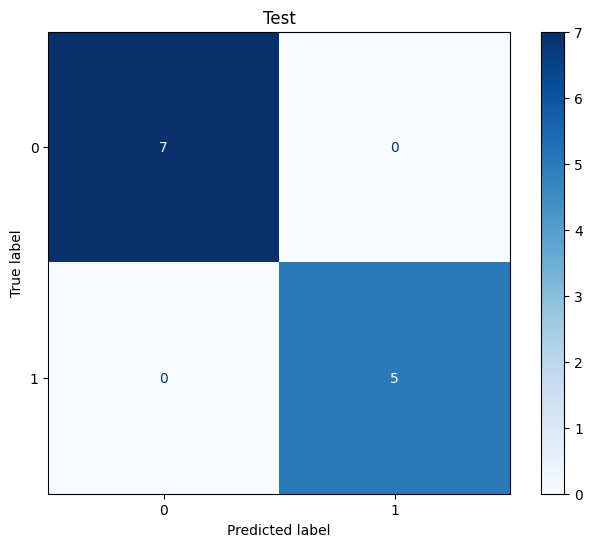

In [22]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,RocCurveDisplay,accuracy_score,ConfusionMatrixDisplay
from sklearn.ensemble import StackingClassifier


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=1)
clf3 = HistGradientBoostingClassifier(random_state=1)
clf4 = AdaBoostClassifier(random_state=1)
clf5 = DecisionTreeClassifier(random_state=1,max_depth=None)
svm_model = svm.SVC(probability=True)

model= StackingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('hgb', clf3), ('ab', clf4), ('dt', clf5)],final_estimator=svm_model,cv=10,stack_method='auto')


print('---------------------------------------------------')
print('------------SVM---------------------------------')
print('---------------------------------------------------')
model.fit(X_to_fit,y_to_fit)
pred_val=model.predict(X_val)
print(f"Validation Dataset Accuracy: {model.score(X_val, pred_val):0.2f}")

auc_score_valid = roc_auc_score(y_val,pred_val)  

print(classification_report(y_val,pred_val))
RocCurveDisplay.from_predictions(y_val,pred_val)
plt.title('Validation')
plt.show()

cm=confusion_matrix(y_val,pred_val,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, values_format='d', cmap='Blues')
ax.set_title('Validation')

print('---------------------------------------------------')
pred_test=model.predict(X_test)
print(f"Test Dataset Accuracy: {model.score(X_test, pred_test):0.2f}")

auc_score_valid = roc_auc_score(y_test,pred_test)  

print(classification_report(y_test,pred_test))
RocCurveDisplay.from_predictions(y_test,pred_test)
plt.title("Test")
plt.show()

cm=confusion_matrix(y_test,pred_test,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, values_format='d', cmap='Blues')
ax.set_title("Test")

print(model)

In [19]:
import pickle

pickle.dump(model, open('model.pkl', 'wb') )
pickle.dump(preprocessor, open('preprocessor.pkl', 'wb') )